In [8]:
import pandas as pd  # For handling data
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # To split data for modeling
from sklearn.linear_model import LinearRegression  # Simple prediction model
from sklearn.metrics import r2_score  # To check how good our model is
print('life is one funny motherfucker')

life is one funny motherfucker


In [9]:
# Load the dataset
data = pd.read_csv('./day.csv') 

# Look at the first few rows to understand it
print(data.head())

# Check basic info (columns, missing values)
print(data.info())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [10]:
# Check for missing values
print(data.isnull().sum())  # check if thre are null dates 

# Drop unnecessary columns (e.g., 'instant' is just an ID, 'dteday' is complex for beginners)
data = data.drop(['instant', 'dteday'], axis=1)

# Rename 'cnt' to 'bike_count' for clarity
data = data.rename(columns={'cnt': 'bike_count'})

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


           season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.0774

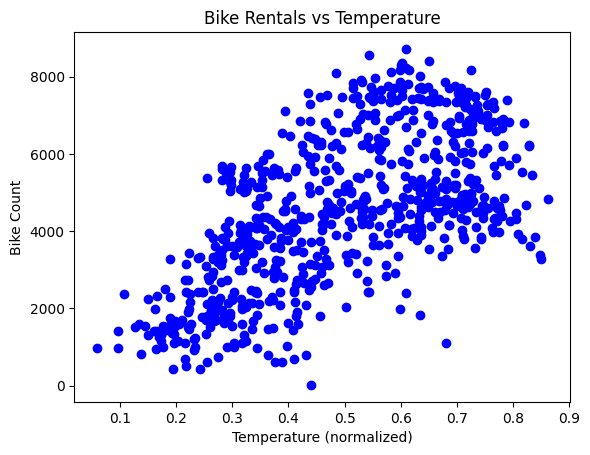

In [11]:
# Basic stats (average bike count, temperature, etc.)
print(data.describe())

# Plot bike count vs temperature to see a pattern
plt.scatter(data['temp'], data['bike_count'], color='blue')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Bike Count')
plt.title('Bike Rentals vs Temperature')
plt.show()

In [12]:
# Choose features (inputs) and target (output)
features = ['temp', 'hum', 'windspeed']  # Weather factors for prediction
X = data[features]  # Input data
y = data['bike_count']  # Object of prediction

# Split data: 80% to train the model, 20% to test it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create a Linear Regression model
model = LinearRegression()

# Train it on the training data
model.fit(X_train, y_train)

# Predict bike counts for the test data
y_pred = model.predict(X_test)

Model Accuracy (R²): 0.50


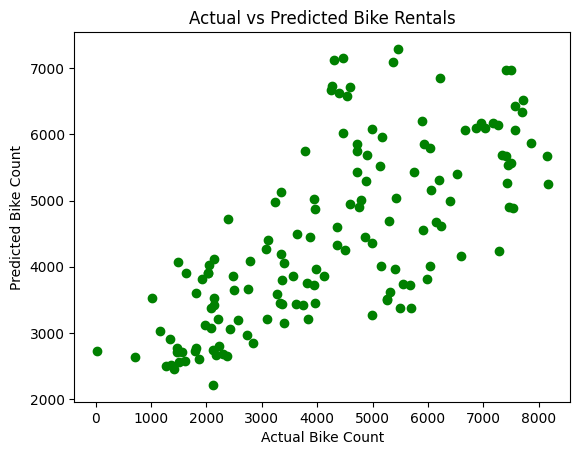

In [14]:
# Check accuracy (R² score: closer to 1 is better)
score = r2_score(y_test, y_pred)
print(f'Model Accuracy (R²): {score:.2f}')

# Plot actual vs predicted bike counts
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Bike Count')
plt.ylabel('Predicted Bike Count')
plt.title('Actual vs Predicted Bike Rentals')
plt.show()

In [15]:
# Print a simple conclusion
print("Insights:")
print(f"- Average bike count: {data['bike_count'].mean():.0f}")
print(f"- Temperature seems to affect rentals (see plot).")
print(f"- Model predicts rentals with {score:.2f} accuracy.")

Insights:
- Average bike count: 4504
- Temperature seems to affect rentals (see plot).
- Model predicts rentals with 0.50 accuracy.
